In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF

from luwiji.dimensionality_reduction import illustration

In [3]:
df = pd.read_csv("data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


# Dataset Splitting

In [4]:
X = df.drop(columns="name").values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

# Visualize Data



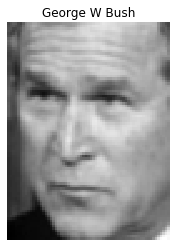

In [7]:
idx = 2
plt.imshow(X_train[idx].reshape(87, 65), cmap="gray")
plt.title(y_train[idx])
plt.axis("off");

# Decide n_components

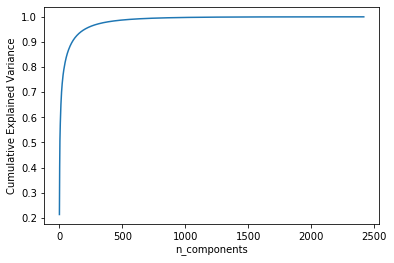

In [9]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance");

# Feature Extraction melalui Dim Reduction

In [16]:
pca = PCA(250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
print(X_train.shape) # hidden layer
print(X_train_pca.shape) # weight / code
print(pca.components_.shape) # fitur

(2418, 5655)
(2418, 250)
(250, 5655)


## Coba visualisasi fitur (component) nya

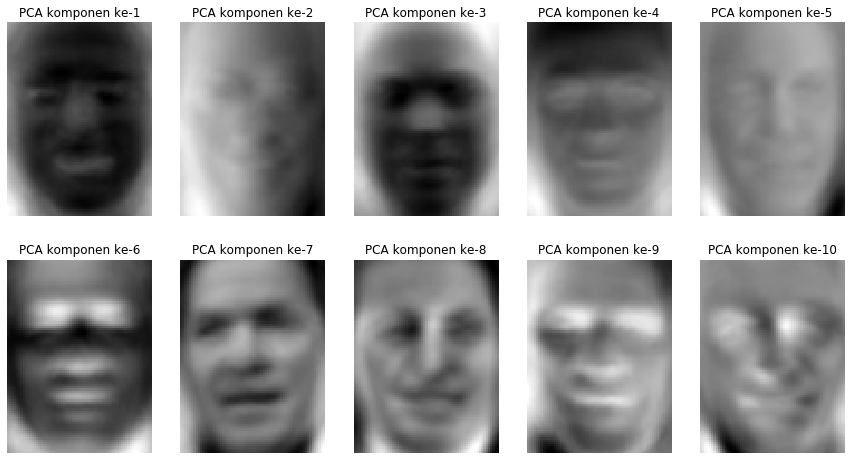

In [21]:
plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87,65), cmap="gray")
    plt.title(f"PCA komponen ke-{i+1}")
    plt.axis("off");

# Reconstruct Image

In [22]:
X_train_inv = pca.inverse_transform(X_train_pca)

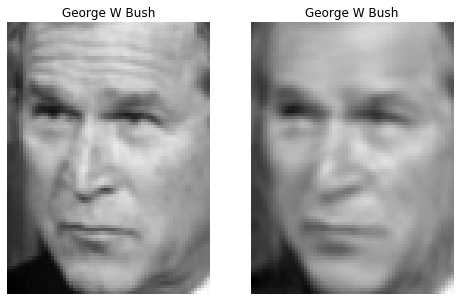

In [23]:
plt.figure(figsize=(8,5))

plt.subplot(121)
plt.imshow(X_train[2].reshape(87,65), cmap="gray")
plt.title(y_train[2])
plt.axis("off");

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87,65), cmap="gray")
plt.title(y_train[2])
plt.axis("off");

# Rekonstruksi PCA itu kombinasi linear dari komponen nya

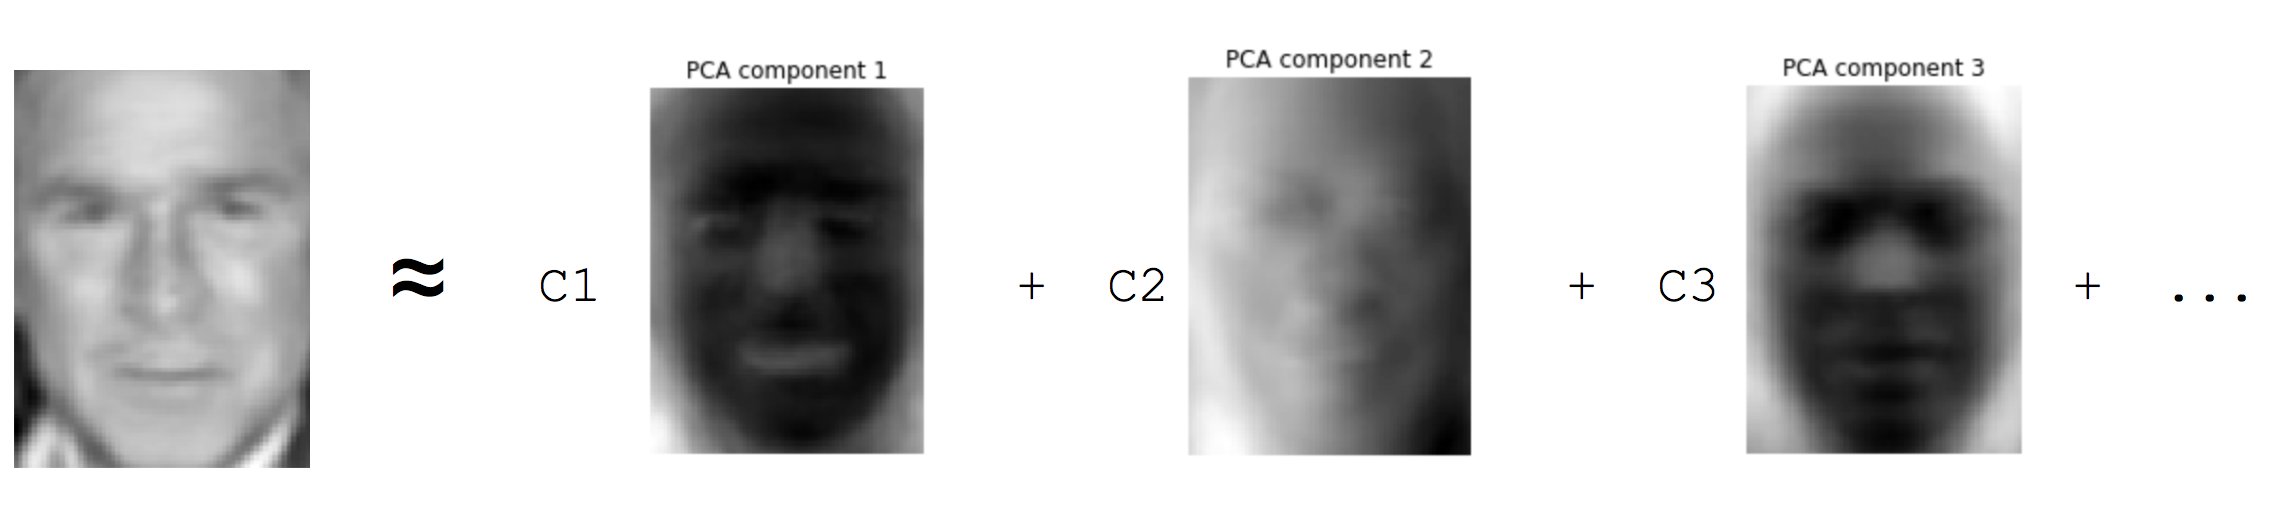

In [24]:
illustration.pca_combination

# Artinya apa? kita bisa encode wajah orang -> Face verification

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
soekarno1 = plt.imread("data/sample_faces/soekarno1.png").reshape(1, -1)
soekarno2 = plt.imread("data/sample_faces/soekarno2.png").reshape(1, -1)
hatta     = plt.imread("data/sample_faces/hatta.png").reshape(1, -1)

In [27]:
pca.transform(soekarno1).shape

(1, 250)

In [28]:
s1 = pca.transform(soekarno1) 
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [29]:
cosine_similarity(s1, s2)

array([[0.99982805]])

In [30]:
cosine_similarity(s1, h1)

array([[0.99976803]])

# iseng: cari wajah yang paling mirip dengan pak soekarno

In [31]:
sim = cosine_similarity(s1, X_train_pca)
sim.argsort()

array([[1092,  955, 1446, ..., 2233, 2262, 1987]], dtype=int64)

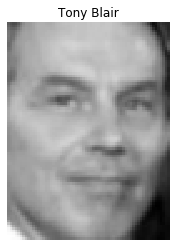

In [35]:
idx = 1092
plt.imshow(X_train[idx].reshape(87, 65), cmap="gray")
plt.title(y_train[idx])
plt.axis("off");

# Other alternative -> Non-Negative Matrix Factorization

Selain SVD, terdapat metode faktorisasi lain yang disebut NMF.<br>
Dulu dikenal sebagai Positive Matrix Factorization, tapi sekarang lebih dikenal sebagai Non-Negative Matrix Factorization (NMF atau NNMF)<br>
SVD mencari orthogonal dengan menggunakan kombinasi linear dari fitur sedangkan NNMF memaksa nilainya untuk tidak negatif. Kelebihan NMF: <br>

* nilai yang positif (cocok untuk image)
* komponen yang dihasilkan biasanya lebih mudah diintregasikan (karena semua positif, menghindari nilai yang canceling)

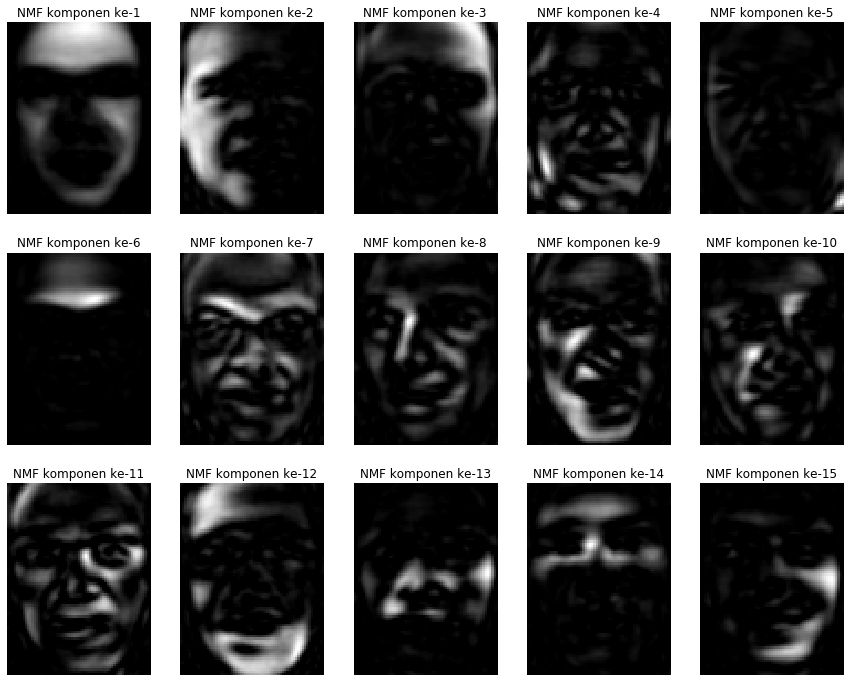

In [36]:
nmf = NMF(250)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

plt.figure(figsize=(15,12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(nmf.components_[i].reshape(87,65), cmap="gray")
    plt.title(f"NMF komponen ke-{i+1}")
    plt.axis("off");

In [37]:
s1 = nmf.transform(soekarno1) 
s2 = nmf.transform(soekarno2)
h1 = nmf.transform(hatta)

In [40]:
cosine_similarity(s1, s2)

array([[0.48651661]])

In [39]:
cosine_similarity(s1, h1)

array([[0.4705424]])